In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

37
[0, 5, 10, 15, 20, 25, 30, 35, 40]
[0, 5, 10, 15, 20, 25, 30, 35, 40]


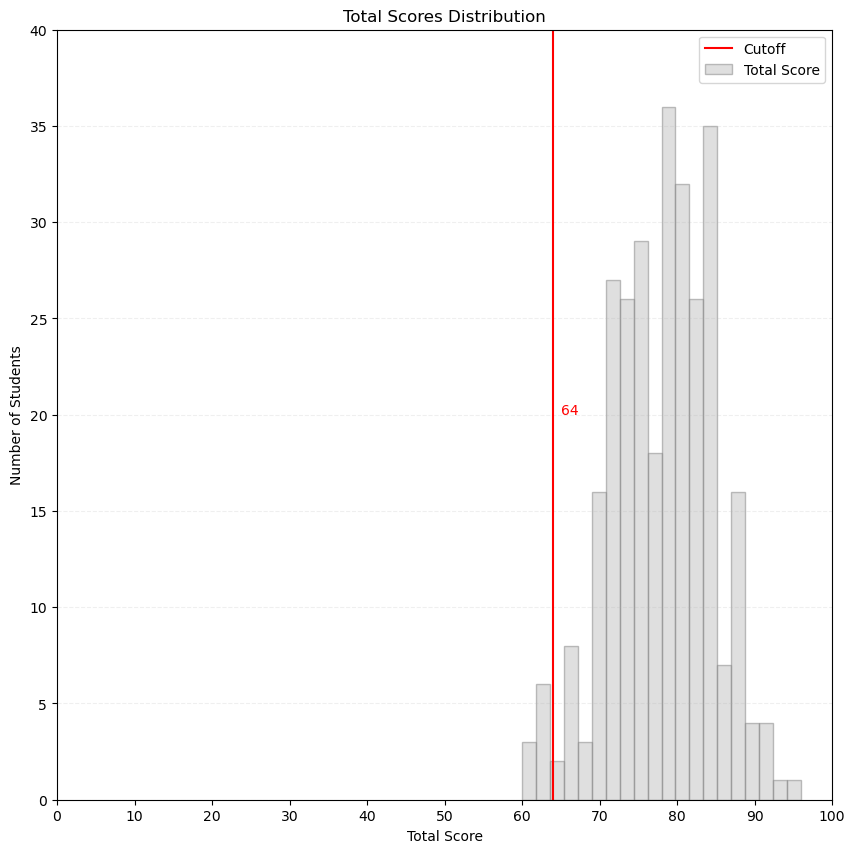

<Figure size 640x480 with 0 Axes>

In [6]:
# ---
# Group No. 8
# 1. นนทรีย์ คำวันสา 6410450486
# 2. วินัสดา นิธิธรรมจรรยา 6410450591
# 3. อรรถวิชญ์ สิทธิ์เดชวิกรม 6410451920
# ---

group = 8 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 3 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P3/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P3/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
data["Total"] = (0.25 * data['HW1'] + 0.25 * data['HW2'] + 0.5 * data['Final']).apply(np.ceil).astype(int)
cutoff = np.floor(data['Total'].mean() - 2 * data['Total'].std())
data['Grade'] = ['S' if score >= cutoff else 'U' for score in data['Total']]

#เรียงข้อมูล
data = data.sort_values(by=['Total'], ascending=False  )

#พล็อตกราฟ
plt.figure(figsize=(10, 10))


plt.hist(data['Total'],bins=20, edgecolor="grey", color="silver", alpha=0.5)
plt.axvline(x=cutoff, color='red' )
plt.xticks(np.arange(0, 110, 10))

# ปรับค่า y-ticks
max_y_value = int(plt.gca().get_ylim()[1])  # ดึงค่า y สูงสุดของกราฟปัจจุบัน
print(max_y_value)
yticks_values = []
maxy = max_y_value//5
remain = max_y_value%5
for i in range(maxy+1):
    if i == 0:
        yticks_values.append(0)
    else:
        yticks_values.append(i*5)
if remain != 0:
    yticks_values.append((maxy+1)*5)
print(yticks_values)
plt.yticks(yticks_values)
print(yticks_values)
# เพิ่มชื่อและป้ายกำกับ
plt.text(cutoff+1, (yticks_values[-1]/2)+(0.05*(len(yticks_values)//2)), f'{int(cutoff)}', color='red', verticalalignment='center')
plt.title('Total Scores Distribution')
plt.xlabel('Total Score')
plt.ylabel('Number of Students')
plt.legend(['Cutoff', 'Total Score'])
plt.grid(True, axis='y',alpha=0.2,linestyle='--')
plt.show()
# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=1000)

# แสดงผลกราฟ
plt.show()